In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [275]:
df=pd.read_csv('diabetic_data_original.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Data Exploration

**1) Data UnderStanding**

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [277]:
df.shape

(101766, 50)

In [278]:
df.iloc[:,0:19].head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648


In [279]:
df.iloc[:,19:30].head(3)

,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide
0,?,?,1,NaN,NaN,No,No,No,No,No,No
1,250.01,255,9,NaN,NaN,No,No,No,No,No,No
2,250,V27,6,NaN,NaN,No,No,No,No,No,No


In [280]:
df.iloc[:,30:51].head(3)

,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO


**2) Data Preprocessing**

In [281]:
med_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

df['medications'] = df[med_columns].apply(lambda row: ', '.join([col for col in med_columns if row[col] != 'No']) if any(row[col] != 'No' for col in med_columns) else 'None', 
    axis=1)

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,medications
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,None
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,insulin
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,glipizide
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,insulin
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,"glipizide, insulin"


In [282]:
df.drop(columns=med_columns,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [283]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,medications
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,250.83,?,?,1,NaN,NaN,No,No,NO,None
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,276,250.01,255,9,NaN,NaN,Ch,Yes,>30,insulin
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,648,250,V27,6,NaN,NaN,No,Yes,NO,glipizide
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,8,250.43,403,7,NaN,NaN,Ch,Yes,NO,insulin
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,197,157,250,5,NaN,NaN,Ch,Yes,NO,"glipizide, insulin"


In [284]:
df.isin(['?']).sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
change                          0
diabetesMed                     0
readmitted                      0
medications                     0
dtype: int64

In [285]:
df.replace('?',np.nan,inplace=True)

In [286]:
df.isin(['?']).sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
change                      0
diabetesMed                 0
readmitted                  0
medications                 0
dtype: int64

In [287]:
df.drop(columns=['encounter_id','patient_nbr','payer_code'],inplace=True)
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,medications
0,Caucasian,Female,[0-10),NaN,6,25,1,1,Pediatrics-Endocrinology,41,...,250.83,NaN,NaN,1,NaN,NaN,No,No,NO,None
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,59,...,276,250.01,255,9,NaN,NaN,Ch,Yes,>30,insulin
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,11,...,648,250,V27,6,NaN,NaN,No,Yes,NO,glipizide
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,44,...,8,250.43,403,7,NaN,NaN,Ch,Yes,NO,insulin
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,51,...,197,157,250,5,NaN,NaN,Ch,Yes,NO,"glipizide, insulin"


In [288]:

def nullvalues(data):
    columns = data.columns.tolist()
    return {col : data[col].isnull().sum() for col in columns if data[col].isnull().sum() > 0}
null_dict = nullvalues(df)

print(null_dict)

null_df = pd.Series(null_dict).to_frame().reset_index().rename(columns={0:'Null_values'})

{'race': np.int64(2273), 'weight': np.int64(98569), 'medical_specialty': np.int64(49949), 'diag_1': np.int64(21), 'diag_2': np.int64(358), 'diag_3': np.int64(1423), 'max_glu_serum': np.int64(96420), 'A1Cresult': np.int64(84748)}


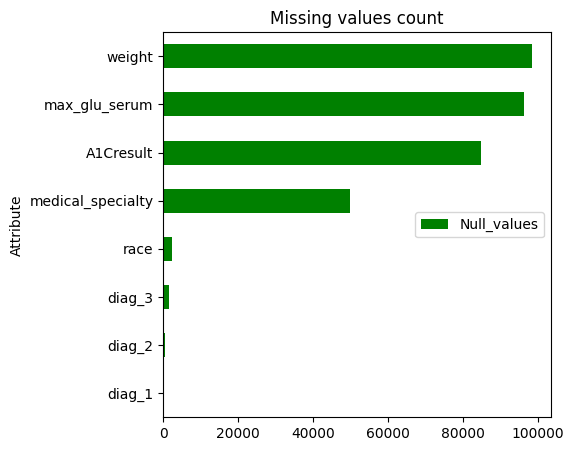

In [289]:
null_df.sort_values(by=['Null_values'],ascending=True).set_index('index').plot(kind='barh'
                                                                               ,color='green',
                                                                              figsize=(5,5))
plt.title("Missing values count")
plt.ylabel("Attribute")
plt.legend(loc='center right')
plt.show()

Some columns contain high percentages of missing values and may need to be dropped or imputed.
If a key analytical column (like weight or payer_code) has many missing values, it is often excluded from 

In [290]:
df.drop(columns='weight',inplace=True)

In [291]:
def Description(data):
    """return dataframe of describing all Attributes
    """
    data_dict = {'Attribute' : data.columns,
                 'Data_type' : [data[column].dtype.name for column in data.columns],
                 'Total_Entries' : [data.shape[0]]*len(data.columns),
                 'Null_values' : data.isnull().sum().values,
                 'Percent_Null_values' : (data.isnull().mean().round(4) * 100).values,
                 'Unique_values' : data.nunique().values} 
    data_details = pd.DataFrame(data_dict)
    return data_details
data_desc = Description(df)

data_desc.sort_values(by=['Percent_Null_values'],ascending=False,ignore_index=True).head(5)

,Attribute,Data_type,Total_Entries,Null_values,Percent_Null_values,Unique_values
0,max_glu_serum,object,101766,96420,94.75,3
1,A1Cresult,object,101766,84748,83.28,3
2,medical_specialty,object,101766,49949,49.08,72
3,race,object,101766,2273,2.23,5
4,diag_3,object,101766,1423,1.40,789


# Analysis for Target Variables

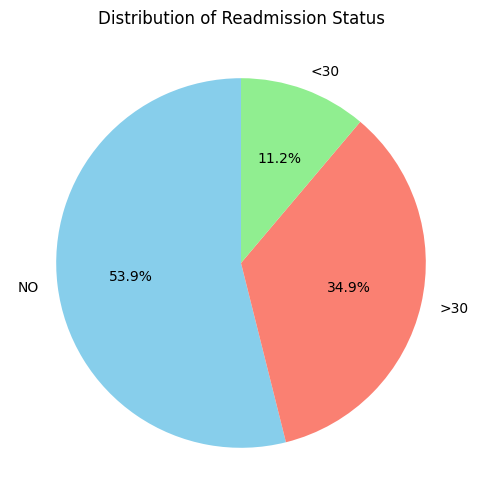

In [292]:
readmitted_counts = df['readmitted'].value_counts()
readmitted_percentage = readmitted_counts / len(df) * 100
plt.figure(figsize=(8,6))
plt.pie(readmitted_counts, labels=readmitted_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen'], startangle=90)
plt.title('Distribution of Readmission Status')
plt.show()

Target contains no null values
since we are interested in the objective i.e 'Early Readmission' or 'No-early-readmission'
we will consider '<30' as 'Readmission' and ['>30','No'] as 'No_Readmission'
we will encode Readmission = 'Yes', No_Readmission = 'No' 

In [293]:
df['readmitted'] = df['readmitted'].map({'<30':'Yes','>30':'No','NO':'No'})

In [294]:
(df['readmitted'].value_counts(normalize=True)*100).round(2)

readmitted
No     88.84
Yes    11.16
Name: proportion, dtype: float64

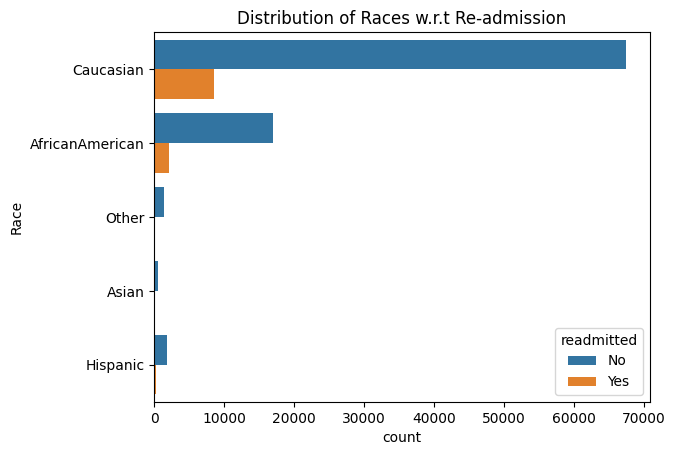

In [295]:
sns.countplot(y = df['race'],hue=df['readmitted'])
plt.title("Distribution of Races w.r.t Re-admission")
plt.ylabel("Race")
plt.show()


from above plot, we can infer that caucasians and AfricanAmericans have 
high re-admission rate

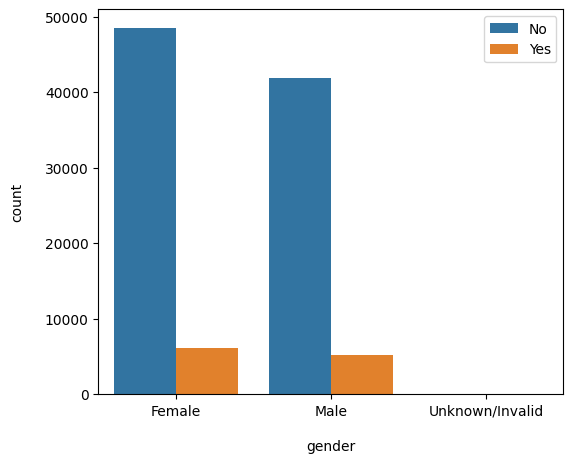

In [296]:
fig,ax = plt.subplots(figsize=(6,5))
sns.countplot(data=df,x='gender',hue=df['readmitted'])
plt.xlabel("gender",labelpad=15.0)
plt.ylabel("count",labelpad=15.0)
plt.legend(loc='upper right')
plt.show()

This compares readmission rates between males and females.
It helps assess whether gender plays a role in patient outcomes and if differentiated healthcare approaches are needed.

In [297]:
df['gender'].value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [298]:
df[df['gender']=='Unknown/Invalid']

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,medications
30506,Other,Unknown/Invalid,[70-80),3,1,1,1,Cardiology,5,5,...,414,411,401,4,NaN,NaN,Ch,Yes,No,"glipizide, pioglitazone"
75551,NaN,Unknown/Invalid,[60-70),1,1,7,1,NaN,38,1,...,808,873,E813,5,NaN,NaN,No,No,No,None
82573,NaN,Unknown/Invalid,[70-80),1,22,7,8,NaN,59,2,...,850,805,808,9,NaN,NaN,Ch,Yes,No,"metformin, rosiglitazone"


In [299]:
df['gender']=df['gender'].replace('Unknown/Invalid',np.nan)

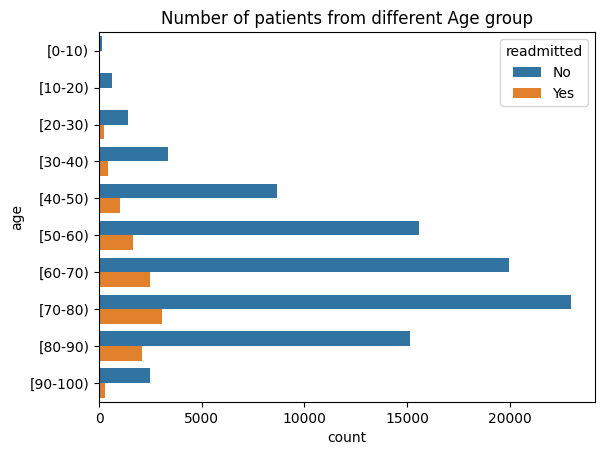

In [300]:
sns.countplot(y=df['age'],hue=df['readmitted'])
plt.title("Number of patients from different Age group")
plt.show()

from above plot we can say most number of patients admissions are in the age range of 40-100
people who are between age 70-80 have highest inpatient encounter as well as re-admission rate

# MApping IDs

In [301]:
admission_type_mapping = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    5: 'Not Available',
    6: 'NULL',
    7: 'Trauma Center',
    8: 'Not Mapped'
}
discharge_mapping = {
    1: 'Discharged to home',
    2: 'Discharged/transferred to another short term hospital',
    3: 'Discharged/transferred to SNF',
    4: 'Discharged/transferred to ICF',
    5: 'Discharged/transferred to another type of institution',
    6: 'Discharged/transferred to home with home health service',
    7: 'Left AMA',
    8: 'Discharged/transferred to home under care of Home IV provider',
    9: 'Admitted as an inpatient to this hospital',
    10: 'Neonate discharged to another hospital',
    11: 'Expired',
    12: 'Still patient or expected to return for outpatient services',
    13: 'Hospice / Home',
    14: 'Hospice / Medical Facility',
    15: 'Discharged/transferred within this institution to Medicare approved swing bed',
    16: 'Discharged/transferred/referred another institution for outpatient services',
    17: 'Discharged/transferred/referred to this institution for outpatient services',
    18: 'Discharged/transferred to a rehab facility',
    19: 'Discharged/transferred to a long term care hospital',
    20: 'Discharged/transferred to a nursing facility certified under Medicaid but not Medicare',
    21: 'Discharged/transferred to a nursing facility certified under Medicare but not Medicaid',
    22: 'Discharged/transferred to a psychiatric hospital or psychiatric distinct part unit of a hospital',
    23: 'Discharged/transferred to a critical access hospital',
    24: 'Discharged/transferred to a Medicare certified long term care hospital',
    25: 'Discharged/transferred to a psychiatric facility',
    26: 'Discharged/transferred to a long term care facility',
    30: 'Still patient',
    99: 'Unknown/Invalid'
}
admission_source_mapping = {
    1: 'Physician Referral',
    2: 'Clinic Referral',
    3: 'HMO Referral',
    4: 'Transfer from a hospital',
    5: 'Transfer from a skilled nursing facility',
    6: 'Transfer from another health care facility',
    7: 'Emergency Room',
    8: 'Court/Law Enforcement',
    9: 'Not Available',
    10: 'Transfer from critial access hospital',
    11: 'Normal Delivery',
    12: 'Premature Delivery',
    13: 'Sick Baby',
    14: 'Extramural Birth',
    15: 'Not Available',
    17: 'Unknown/Invalid'
}

df['admission_type'] = df['admission_type_id'].map(admission_type_mapping)
df['discharge'] = df['discharge_disposition_id'].map(discharge_mapping)
df['admission_source'] = df['admission_source_id'].map(admission_source_mapping)

df.drop(['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis=1, inplace=True)
df.head()

,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,medications,admission_type,discharge,admission_source
0,Caucasian,Female,[0-10),1,Pediatrics-Endocrinology,41,0,1,0,0,...,1,NaN,NaN,No,No,No,None,NULL,Discharged/transferred to a psychiatric facility,Physician Referral
1,Caucasian,Female,[10-20),3,NaN,59,0,18,0,0,...,9,NaN,NaN,Ch,Yes,No,insulin,Emergency,Discharged to home,Emergency Room
2,AfricanAmerican,Female,[20-30),2,NaN,11,5,13,2,0,...,6,NaN,NaN,No,Yes,No,glipizide,Emergency,Discharged to home,Emergency Room
3,Caucasian,Male,[30-40),2,NaN,44,1,16,0,0,...,7,NaN,NaN,Ch,Yes,No,insulin,Emergency,Discharged to home,Emergency Room
4,Caucasian,Male,[40-50),1,NaN,51,0,8,0,0,...,5,NaN,NaN,Ch,Yes,No,"glipizide, insulin",Emergency,Discharged to home,Emergency Room


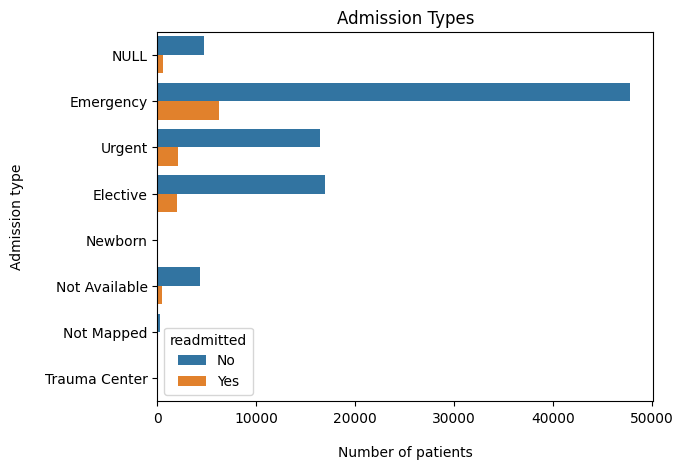

In [302]:
sns.countplot(y=df['admission_type'],hue=df['readmitted'])
plt.title("Admission Types")
plt.xlabel("Number of patients",labelpad=15.0)
plt.ylabel("Admission type",labelpad=15.0)
plt.show()

This chart illustrates how different types of hospital admissions relate to patient readmission. Patients admitted via emergency or urgent types tend to have higher readmission rates, possibly due to the severity and acute nature of their conditions. On the other hand, elective admissions are generally associated with more stable cases, showing lower readmission likelihood. This suggests the admission type can be a predictive factor for hospital resource planning and follow-up care.

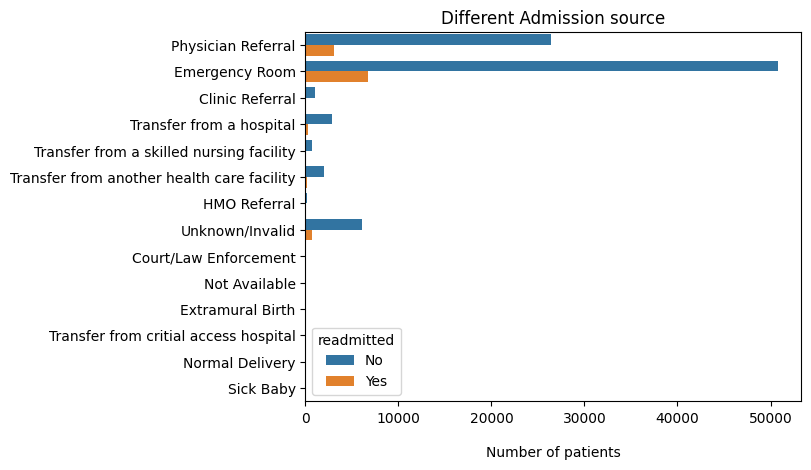

In [303]:
sns.countplot(y=df['admission_source'],hue=df['readmitted'])
plt.xlabel("Number of patients",labelpad=15.0)
plt.ylabel("",labelpad=15.0)
plt.title("Different Admission source")
plt.show()


This visualization explores how the origin of admission impacts readmission. Patients who enter the hospital through emergency rooms or referrals from clinics show higher readmission rates compared to those admitted through regular outpatient follow-ups. This pattern indicates that patients who enter via less controlled or urgent channels may be at a higher risk of recurring issues, and could benefit from closer post-discharge monitoring

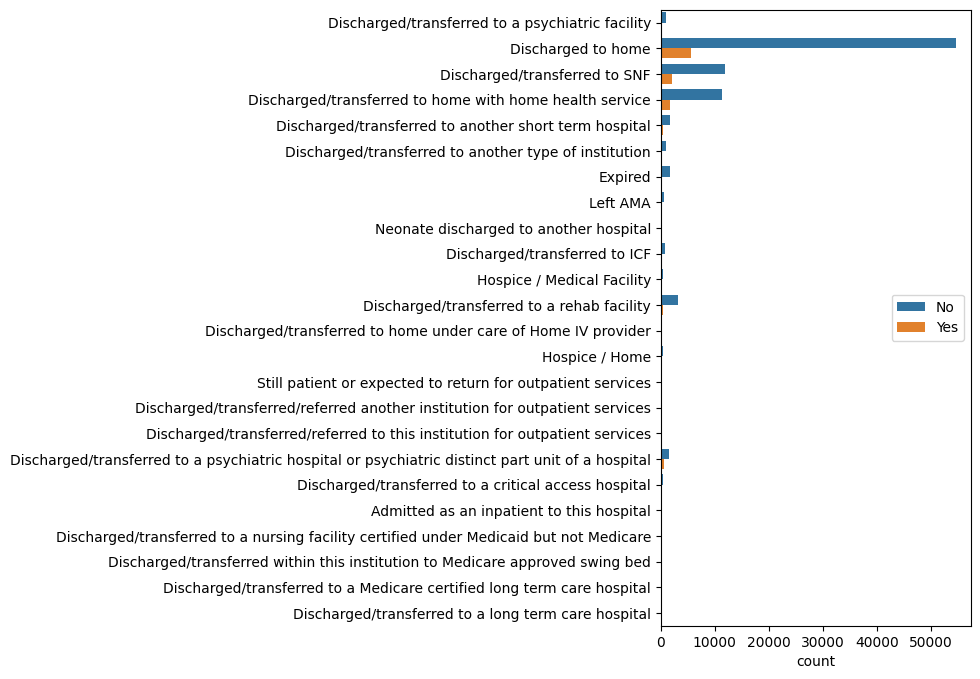

In [304]:
plt.figure(figsize=(4,8))
sns.countplot(y=df['discharge'],hue=df['readmitted'])
plt.ylabel("")
plt.legend(loc='center right')
plt.show()

This plot highlights the relationship between where patients go after discharge and their likelihood of readmission. Patients discharged to home tend to have lower readmission rates, whereas those sent to rehabilitation centers, skilled nursing facilities, or hospice care show elevated readmission rates. This may reflect that these patients have more complex or unstable health conditions, requiring long-term support. The insight can guide hospitals to flag high-risk discharges for follow-up.

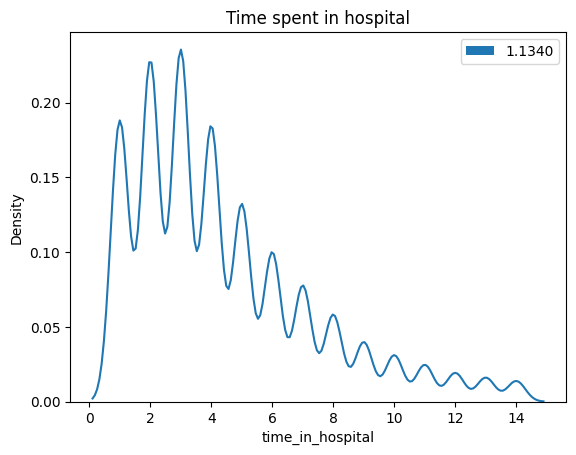

In [305]:
sns.kdeplot(df['time_in_hospital'])
skewness_time = f"{df['time_in_hospital'].skew():0.4f}"
kde_patch = mpatches.Patch(label=skewness_time)
plt.title("Time spent in hospital")
plt.legend(handles=[kde_patch])
plt.show()

/tmp/ipykernel_56649/810984230.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df[df['readmitted'] == category]['time_in_hospital'],
/tmp/ipykernel_56649/810984230.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df[df['readmitted'] == category]['time_in_hospital'],


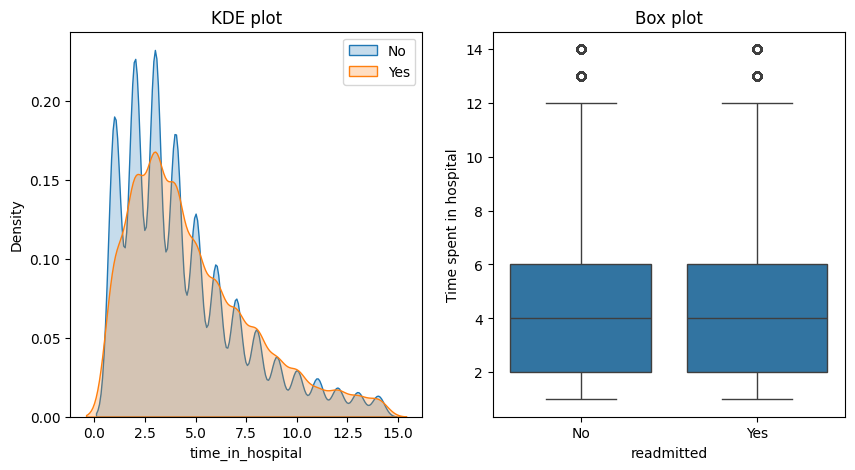

In [306]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

for category in df.readmitted.unique():
    sns.kdeplot(df[df['readmitted'] == category]['time_in_hospital'],
                fill=True,palette='viridis',label=category,ax=ax[0])
ax[0].legend()
ax[0].set_title("KDE plot")
ax[1] = sns.boxplot(data=df,x='readmitted',y='time_in_hospital',ax=ax[1])
ax[1].set_ylabel("Time spent in hospital")
ax[1].set_title("Box plot")

plt.show()

If the distribution is skewed, some patients tend to stay longer than others.
The boxplot reveals differences in length of stay between readmitted and non-readmitted patients.

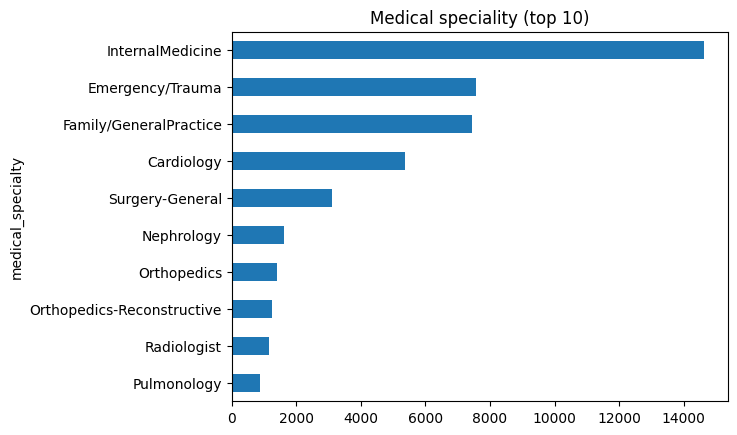

In [307]:
df.medical_specialty.value_counts().nlargest(10).sort_values().plot(kind='barh')
plt.title("Medical speciality (top 10)",fontsize=12)
plt.show()

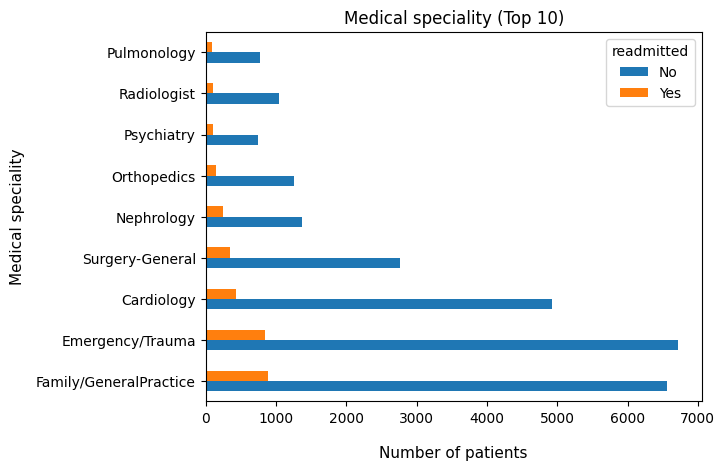

In [308]:
pd.crosstab(df['medical_specialty'],
            df['readmitted']).sort_values(by=['Yes'],ascending=0).iloc[1:10].plot(kind='barh')
plt.xlabel("Number of patients",fontsize=11,labelpad=15)
plt.title("Medical speciality (Top 10)")
plt.ylabel("Medical speciality",fontsize=11,labelpad=8)
plt.show()

Shows the most common medical specialties in the dataset.
Also helps analyze whether certain specialties have higher readmission rates.

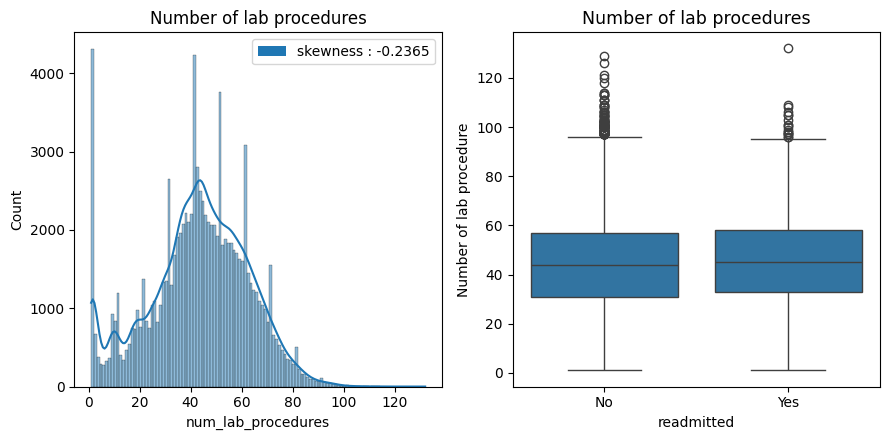

In [309]:
skewness_lab_pro = f"skewness : {df['num_lab_procedures'].skew():0.4f}"
kde_patch_lab_pro = mpatches.Patch(label=skewness_lab_pro)

fig,ax = plt.subplots(1,2,figsize=(9,4.5))

ax[0]=sns.histplot(data=df, x='num_lab_procedures', kde=True, ax=ax[0])
ax[0].set_title("Number of lab procedures", fontsize=12)
ax[0].legend(handles=[kde_patch_lab_pro])

ax[1] = sns.boxplot(data=df,x='readmitted',y='num_lab_procedures',ax=ax[1])
ax[1].set_ylabel("Number of lab procedure")
ax[1].set_title("Number of lab procedures",fontsize=12.5)

plt.tight_layout()
plt.show()

/tmp/ipykernel_56649/3918890459.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df[df['readmitted'] == category]['num_lab_procedures'],


/tmp/ipykernel_56649/3918890459.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df[df['readmitted'] == category]['num_lab_procedures'],


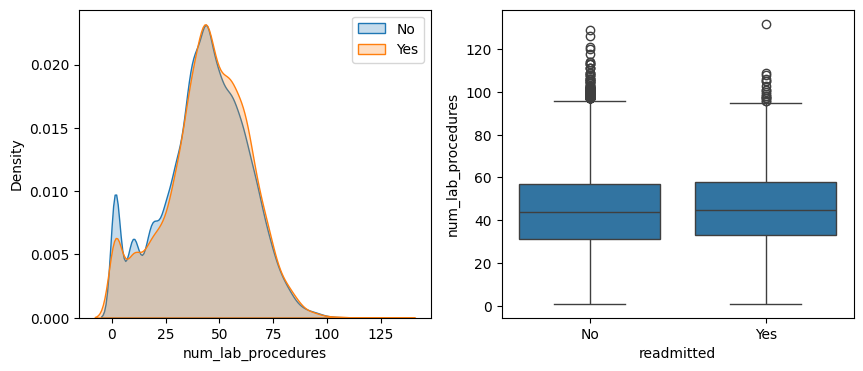

In [310]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
for category in df.readmitted.unique():
    sns.kdeplot(df[df['readmitted'] == category]['num_lab_procedures'],
                fill=True,palette='viridis',label=category,ax=ax[0])
ax[0].legend()

sns.boxplot(data=df,x='readmitted',y='num_lab_procedures',ax=ax[1])
plt.show()

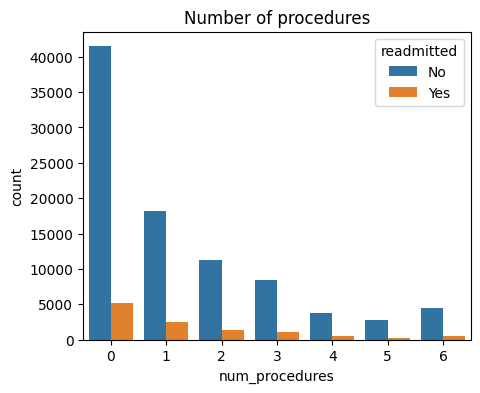

In [311]:
fig,ax = plt.subplots(figsize=(5,4))
ax = sns.countplot(x='num_procedures',hue='readmitted',data=df)
ax.set_title("Number of procedures")
plt.show()

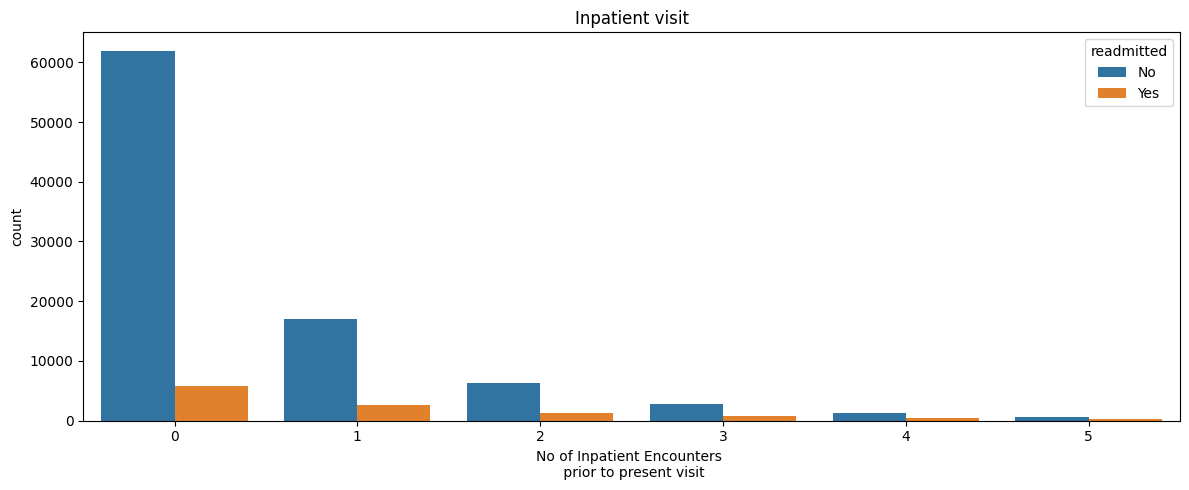

In [312]:
fig, ax = plt.subplots(figsize=(12, 5))
filtered_df = df[df['number_inpatient'].isin(range(6))]

sns.countplot(x='number_inpatient', hue='readmitted', data=filtered_df, ax=ax)

ax.set_title("Inpatient visit")
ax.set_xlabel("No of Inpatient Encounters \n prior to present visit")

plt.tight_layout() 
plt.show()


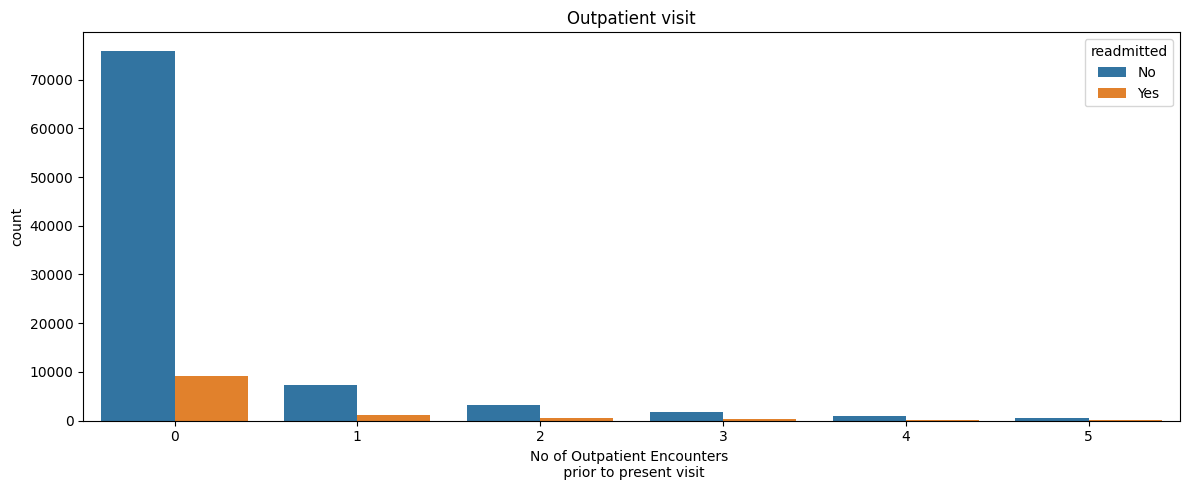

In [313]:
fig, ax = plt.subplots(figsize=(12, 5))
filtered_df = df[df['number_outpatient'].isin(range(6))]

sns.countplot(x='number_outpatient', hue='readmitted', data=filtered_df, ax=ax)

ax.set_title("Outpatient visit")
ax.set_xlabel("No of Outpatient Encounters \n prior to present visit")

plt.tight_layout() 
plt.show()

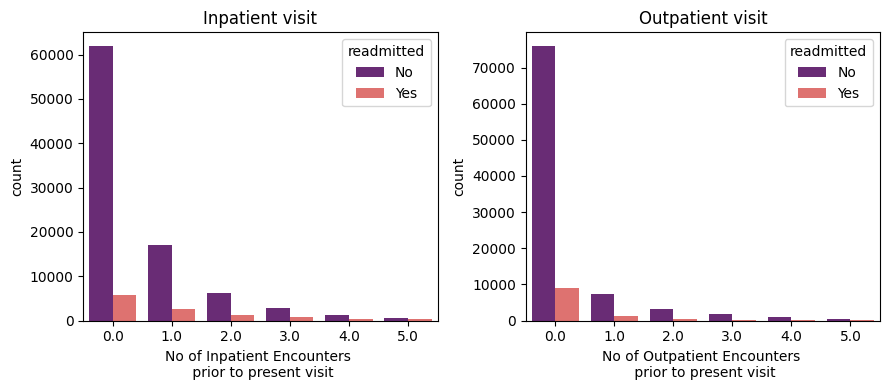

In [314]:
fig,ax = plt.subplots(1,2,figsize=(9,4))

filtered_df = df[df['number_inpatient'].isin(range(6))]
sns.countplot(x='number_inpatient',
             hue=df['readmitted'],data=filtered_df,ax=ax[0],palette='magma')
ax[0].set_title("Inpatient visit")
ax[0].set_xlabel("No of Inpatient Encounters \n prior to present visit")

filtered_df = df[df['number_outpatient'].isin(range(6))]
sns.countplot(x='number_outpatient',
             hue=df['readmitted'],data=filtered_df,ax=ax[1],palette='magma')
ax[1].set_title("Outpatient visit")
ax[1].set_xlabel("No of Outpatient Encounters \n prior to present visit")

plt.tight_layout()
plt.show()

Visualizing upto 5 Inpatient and outpatient encounters
Since we are interested in only early re-admission rates (<30 days)
Observations says 0 or 1 previous Inpatient encounters have high re-admission rate 
Observations says 0 previous Outpatient encounters have high re-admission rate
People having prior significant Inpatient/Outpatient encounters have less chance of getting readmitted 
be it less than 30 days or greater than 30 days
Hospital administration might have taken Post-Hospitalization steps to prevent re-admission
But the early re-admission (<30) is a area of interest.

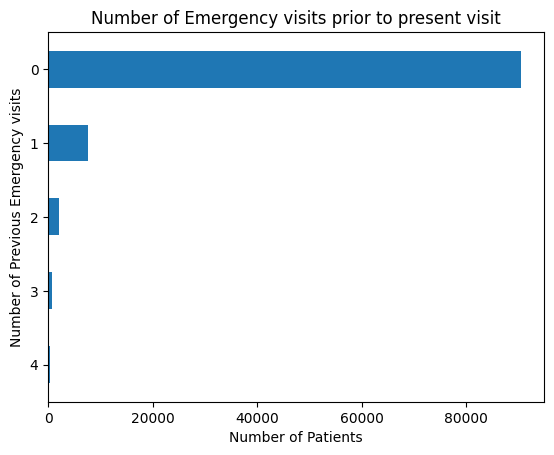

In [315]:
df.number_emergency.value_counts().nlargest(5).sort_values(ascending=1).plot(kind='barh')
plt.xlabel("Number of Patients")
plt.ylabel("Number of Previous Emergency visits")
plt.title("Number of Emergency visits prior to present visit")
plt.show()

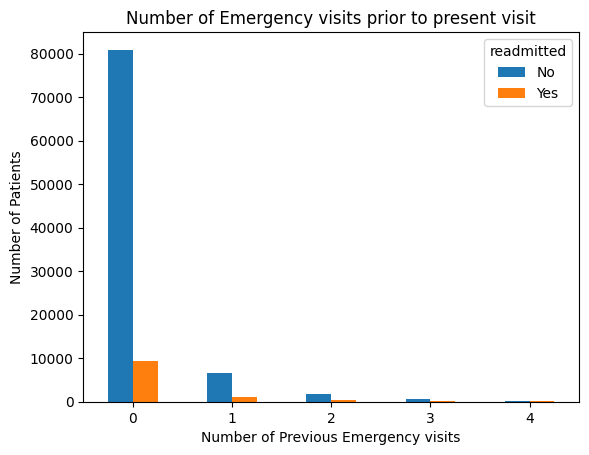

In [316]:
pd.crosstab(df['number_emergency'],df['readmitted']).iloc[0:5].plot(kind='bar',rot=0)
plt.ylabel("Number of Patients")
plt.xlabel("Number of Previous Emergency visits")
plt.title("Number of Emergency visits prior to present visit")
plt.show()

These visuals explore whether an increased number of lab procedures, outpatient visits, or emergency visits correlates with higher readmission rates.
More medical activity may indicate more complex or critical patients.

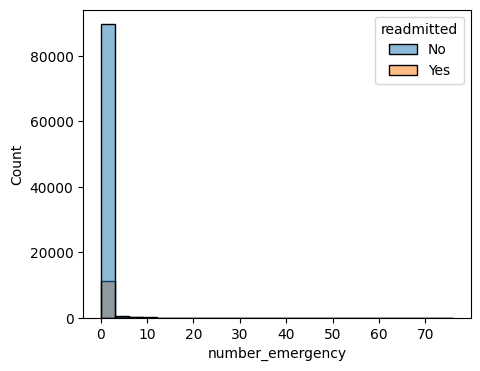

In [317]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
sns.histplot(data = df,x ='number_emergency',hue='readmitted',bins=25)
plt.show()

# Diagnosis

In [318]:
diagnosis = ['diag_1','diag_2','diag_3']
for diag in diagnosis:
    df.loc[df[diag].astype('string').str.contains('[A-Za-z].+[0-9]*'), diag] = -1
    df[diag] = df[diag].astype(np.float64)

In [319]:
def diagnosis_encoding(x):
    if (x >= 140 and x <= 239):
        return 'Neoplasms'
    elif x == 785 or (x >=390 and x <= 459):
        return 'circulatory'
    elif x == 786 or (x >= 460 and x <= 519):
        return 'Respiratory'
    elif x == 787 or (x >= 520 and x <= 579):
        return 'Digestive'
    elif x >= 250 and (x >= 250 and x <= 251):
        return 'Diabetes'
    elif x >= 800 and x <= 1000:
        return 'Injury'
    elif x >= 710 and x <= 739:
        return 'Musculoskeletal'
    elif (x >=580 and x <= 629) or x == 788: 
        return 'Genitourinary'
    elif x == -1:
        return 'other'
    elif pd.isnull(x):
        return np.nan
    else: 
        return 'other'

In [320]:
diagnosis = ['diag_1','diag_2','diag_3']
for diag in diagnosis:
    df[diag] = df[diag].apply(diagnosis_encoding)

In [321]:
df.iloc[:,10:25].head()

,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,medications,admission_type,discharge,admission_source
0,0,Diabetes,NaN,NaN,1,NaN,NaN,No,No,No,None,NULL,Discharged/transferred to a psychiatric facility,Physician Referral
1,0,other,Diabetes,other,9,NaN,NaN,Ch,Yes,No,insulin,Emergency,Discharged to home,Emergency Room
2,1,other,Diabetes,other,6,NaN,NaN,No,Yes,No,glipizide,Emergency,Discharged to home,Emergency Room
3,0,other,Diabetes,circulatory,7,NaN,NaN,Ch,Yes,No,insulin,Emergency,Discharged to home,Emergency Room
4,0,Neoplasms,Neoplasms,Diabetes,5,NaN,NaN,Ch,Yes,No,"glipizide, insulin",Emergency,Discharged to home,Emergency Room


In [322]:
diagnosis = ['diag_1','diag_2','diag_3']
df[diagnosis].isnull().sum()

diag_1      21
diag_2     358
diag_3    1423
dtype: int64

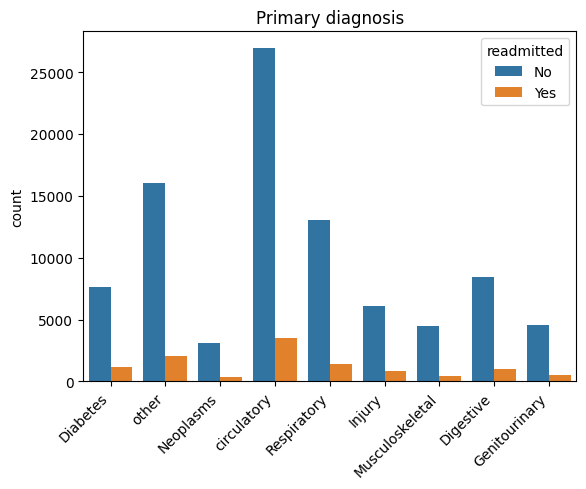

In [323]:
plt.figure(figsize=(14,10))
plt.subplot(221)
sns.countplot(x=df['diag_1'],hue=df['readmitted'])
plt.title("Primary diagnosis")
plt.xlabel("")
plt.xticks(rotation=45,ha='right')
plt.show()

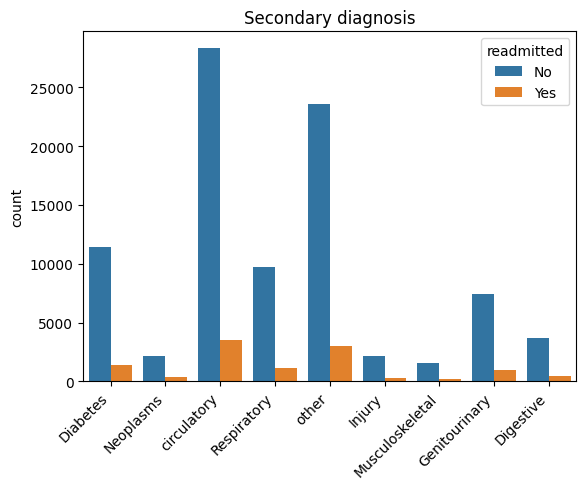

In [324]:
plt.figure(figsize=(14,10))
plt.subplot(221)
sns.countplot(x=df['diag_2'],hue=df['readmitted'])
plt.title("Secondary diagnosis")
plt.xlabel("")
plt.xticks(rotation=45,ha='right')
plt.show()

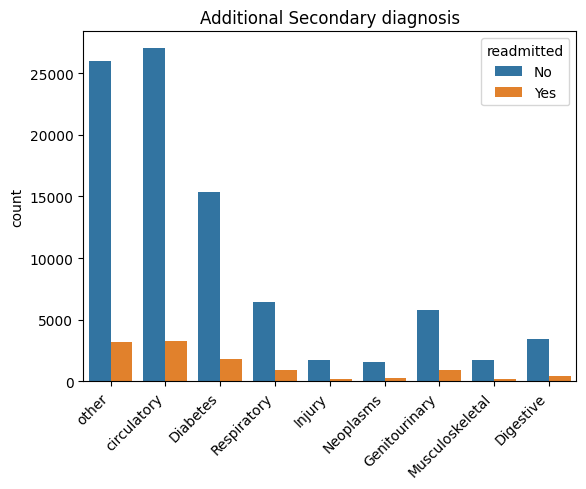

In [325]:
plt.figure(figsize=(14,10))
plt.subplot(221)
sns.countplot(x=df['diag_3'],hue=df['readmitted'])
plt.title("Additional Secondary diagnosis")
plt.xlabel("")
plt.xticks(rotation=45,ha='right')
plt.show()

irculatory, Respiratory & Diabetes diagnosed patients are having high readmissions

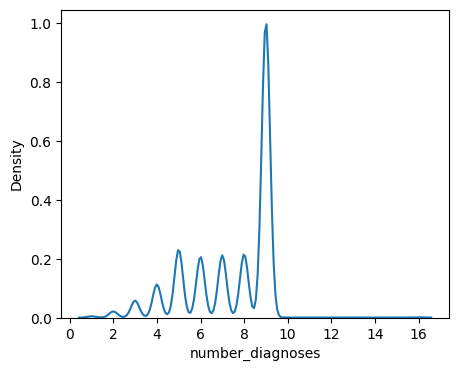

In [326]:
fig,ax = plt.subplots(figsize=(5,4))
sns.kdeplot(df['number_diagnoses'])
plt.show()

Above data does not follow normality

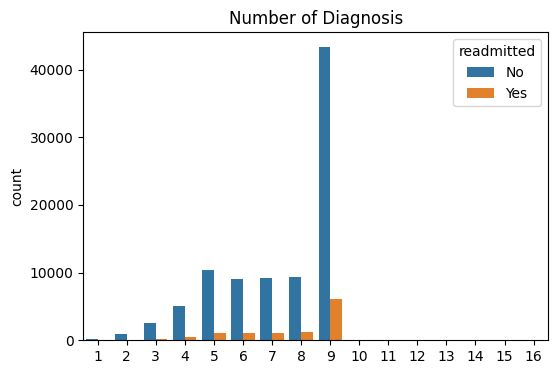

In [327]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='number_diagnoses',hue='readmitted')
plt.title("Number of Diagnosis")
plt.xlabel("")
plt.show()

In [328]:
df['max_glu_serum'].unique()

array([nan, '>300', 'Norm', '>200'], dtype=object)

In [329]:
df['max_glu_serum']=df['max_glu_serum'].replace(np.nan,'None')

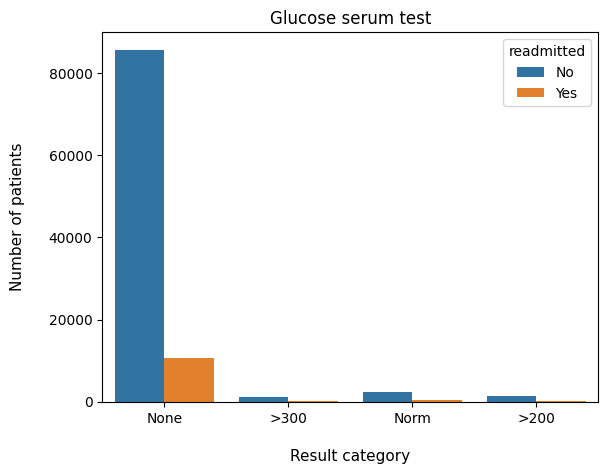

In [330]:
sns.countplot(x=df['max_glu_serum'],hue=df['readmitted'])
plt.title("Glucose serum test")
plt.xlabel("Result category",labelpad=17,fontsize=11)
plt.ylabel("Number of patients",labelpad=17,fontsize=11)
plt.show()

Inpatient encounters where Glucose serum test has not been done, more cases of early re-admission

In [331]:
df['A1Cresult'].value_counts()

A1Cresult
>8      8216
Norm    4990
>7      3812
Name: count, dtype: int64

In [332]:
df['A1Cresult'].isnull().sum()

np.int64(84748)

In [333]:
df['A1Cresult']=df['A1Cresult'].replace(np.nan,'None')

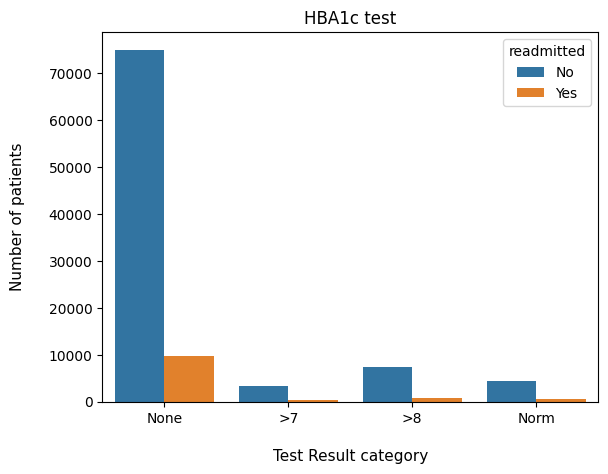

In [334]:
sns.countplot(x=df['A1Cresult'],hue=df['readmitted'])
plt.title("HBA1c test")
plt.xlabel("Test Result category",labelpad=17,fontsize=11)
plt.ylabel("Number of patients",labelpad=17,fontsize=11)
plt.show()

from above observation it shows that peope who have not undergone HBA1c test,
they have high re-admission probability.
also compared to '>7','Norm' the people who have '>8' HBA1c result have slightly higher
readmission probability.

# Analysis of midicine with respect to Admission

In [335]:
df['num_medications_taken'] = df['medications'].apply(lambda x: 0 if x == 'None' else len(x.split(',')))

/tmp/ipykernel_56649/3514526720.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=med_counts.values, y=med_counts.index, palette='viridis')


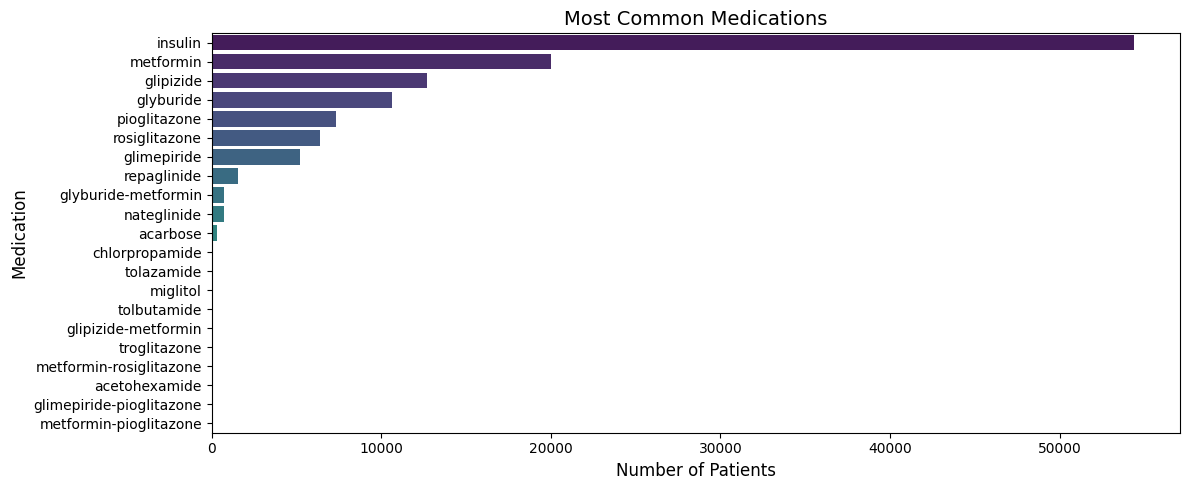

In [336]:
med_lists = df['medications'].apply(lambda x: [] if x == 'None' else x.split(', '))
flat_med_list = np.concatenate(med_lists.values)
med_counts = pd.Series(flat_med_list).value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(x=med_counts.values, y=med_counts.index, palette='viridis')
plt.title("Most Common Medications", fontsize=14)
plt.xlabel("Number of Patients", fontsize=12)
plt.ylabel("Medication", fontsize=12)
plt.tight_layout()
plt.show()

We see most common medication

In [337]:
med_lists = df['medications'].apply(lambda x: [] if x == 'None' else x.split(', '))

all_med_names = sorted(set(np.concatenate(med_lists.values)))

med_usage = pd.DataFrame(0, index=df.index, columns=all_med_names)

for med in all_med_names:
    med_usage[med] = med_lists.apply(lambda meds: 1 if med in meds else 0)


In [338]:
total_patients = len(df)

med_summary_counts = pd.DataFrame()
med_summary_counts['taking'] = med_usage.sum()
med_summary_counts['not_taking'] = total_patients - med_summary_counts['taking']

med_summary_counts.sort_values('taking', ascending=False, inplace=True)

med_summary_counts.head()

,taking,not_taking
insulin,54383,47383
metformin,19988,81778
glipizide,12686,89080
glyburide,10650,91116
pioglitazone,7328,94438


<Figure size 1000x800 with 0 Axes>

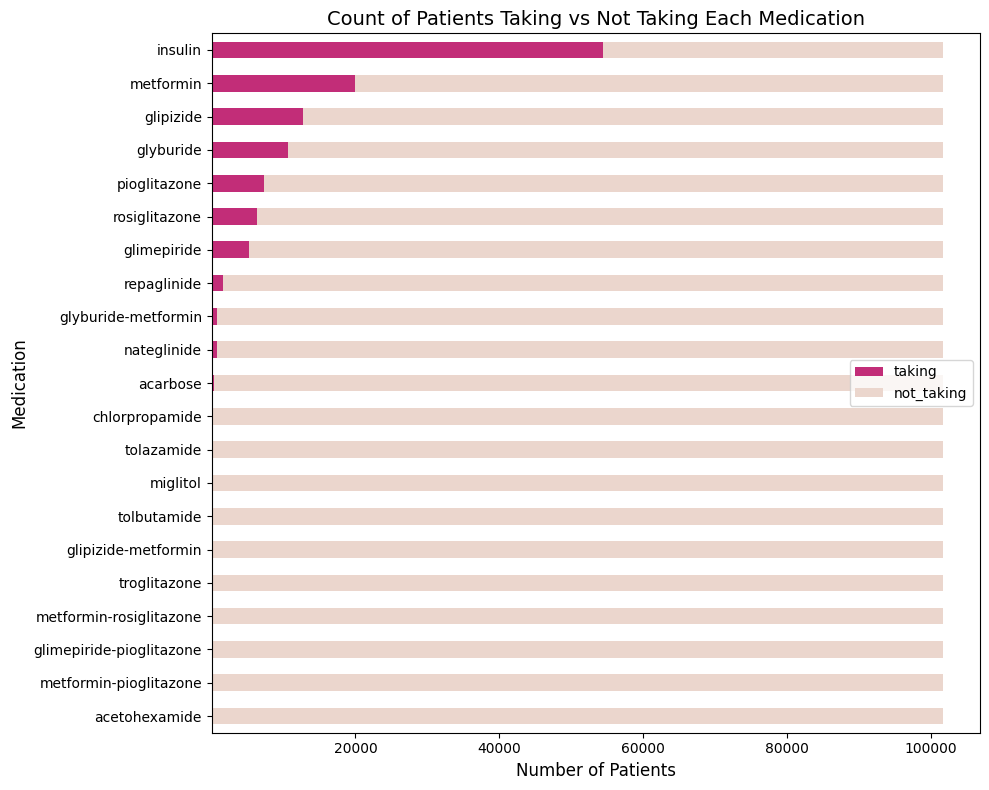

In [339]:
plt.figure(figsize=(10, 8))
med_summary_counts.sort_values('taking', ascending=True)[['taking', 'not_taking']].plot(
    kind='barh',
    stacked=True,
    color=['#C22D78', '#EBD6CD'],
    figsize=(10, 8)
)

plt.title("Count of Patients Taking vs Not Taking Each Medication", fontsize=14)
plt.xlabel("Number of Patients", fontsize=12)
plt.ylabel("Medication", fontsize=12)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

clearly we can see the zero values in some medicines which means 
Some medicines are not at all taken by any patients.
or very few value_counts, which will not give any information.

# Change of diabetic medication

/tmp/ipykernel_56649/832260904.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['change'],palette='hot',ax=ax[0])


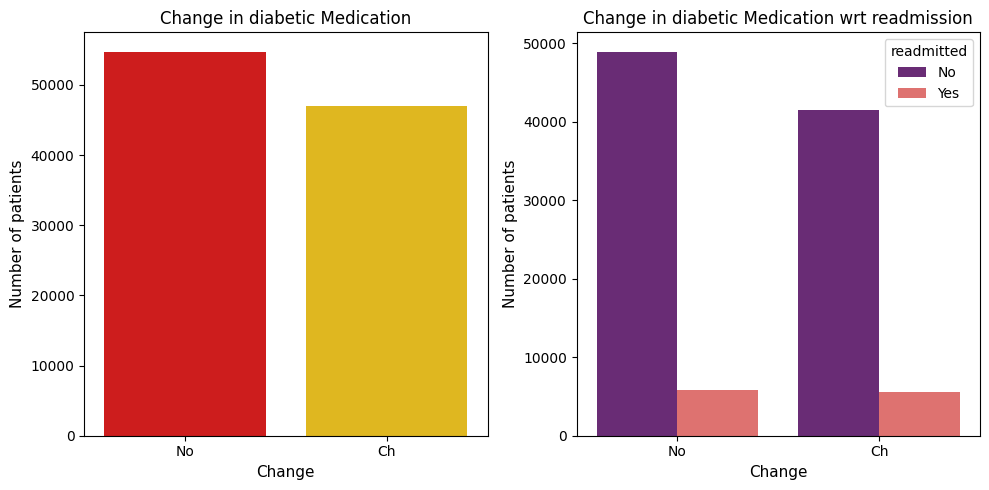

In [340]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['change'],palette='hot',ax=ax[0])
sns.countplot(x=df['change'],palette='magma',hue=df['readmitted'],ax=ax[1])
ax[0].set_xlabel("Change",fontsize=11)
ax[1].set_xlabel("Change",fontsize=11)

ax[0].set_ylabel("Number of patients",fontsize=11)
ax[1].set_ylabel("Number of patients",fontsize=11)


ax[0].set_title("Change in diabetic Medication")
ax[1].set_title("Change in diabetic Medication wrt readmission")
plt.tight_layout()
plt.show()

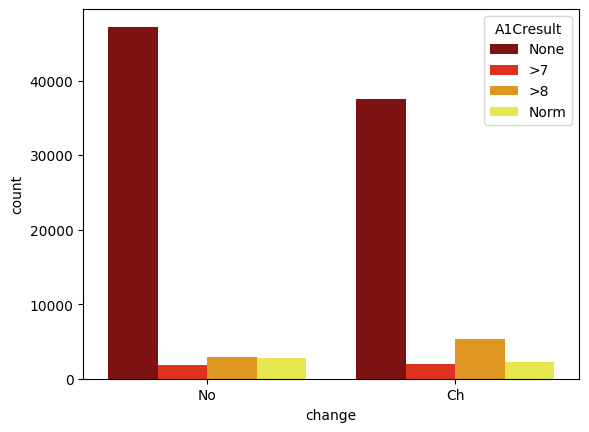

In [341]:
sns.countplot(x=df['change'],palette='hot',hue=df['A1Cresult'])
plt.show()

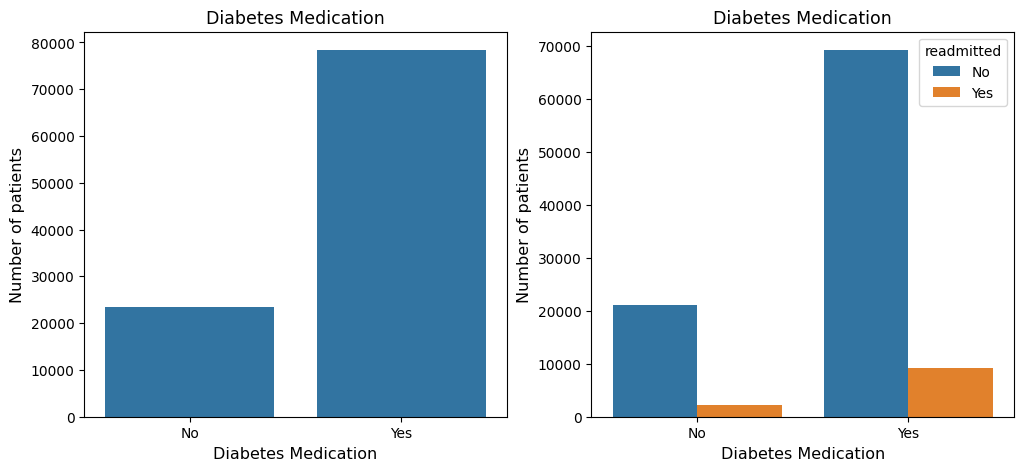

In [342]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=df['diabetesMed'],ax=ax[0])
ax[0].set_title("Diabetes Medication",fontsize=12.5)
ax[0].set_xlabel("Diabetes Medication",fontsize=11.5)
ax[0].set_ylabel("Number of patients",fontsize=11.5)

sns.countplot(x=df['diabetesMed'],hue=df['readmitted'],ax=ax[1])
ax[1].set_title("Diabetes Medication",fontsize=12.5)
ax[1].set_xlabel("Diabetes Medication",fontsize=11.5)
ax[1].set_ylabel("Number of patients",fontsize=11.5)

plt.show()

From above plot we can see that,medications have been changed for 
have high readmission chances

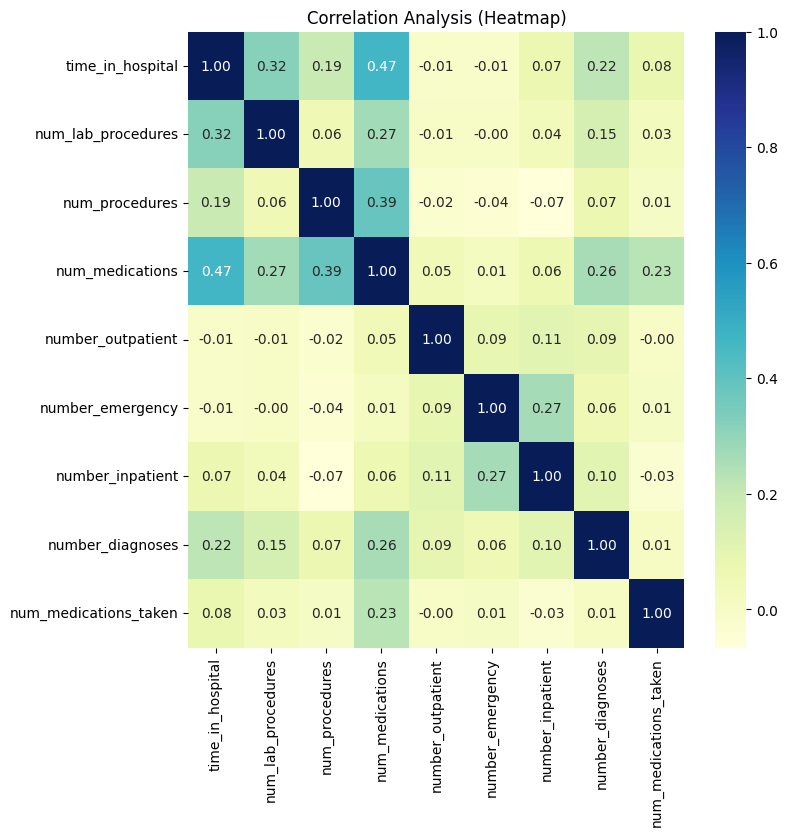

In [343]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes(np.number).corr(),annot=True,fmt='0.2f',cmap='YlGnBu')
plt.title("Correlation Analysis (Heatmap)",fontsize=12)
plt.show()

Shows correlations between numeric variables.
For instance, a higher number of procedures might relate to longer hospital stays or increased readmission.

In [344]:
pair_analysis = ['time_in_hospital','num_lab_procedures','num_medications','readmitted']
pair_analysis_other = ['number_outpatient', 'number_emergency',
                       'number_inpatient','readmitted']
pair_analysis=df[pair_analysis]
pair_analysis_other=df[pair_analysis_other]

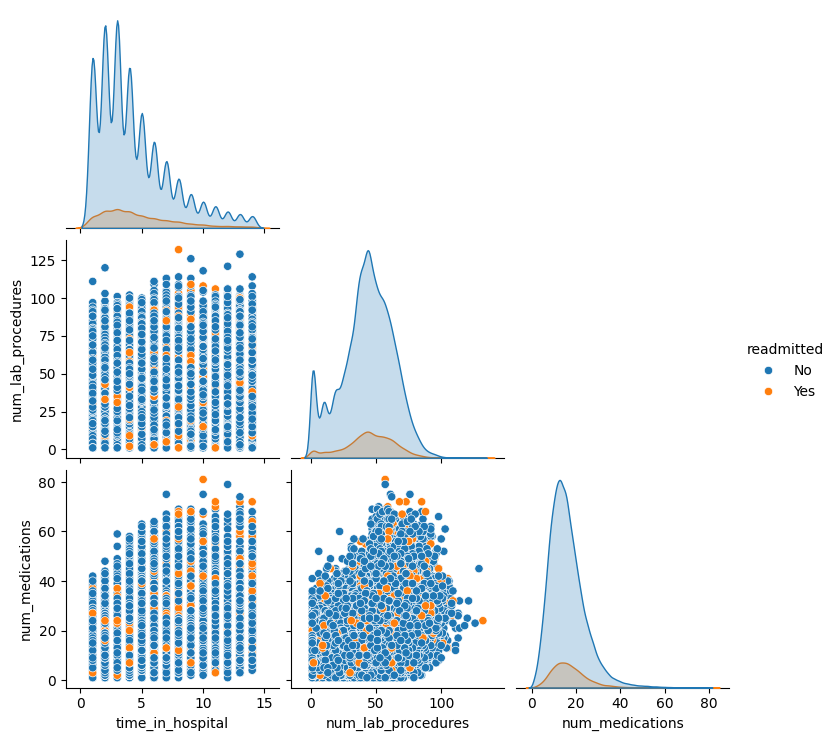

In [345]:
sns.pairplot(data=pair_analysis,hue="readmitted",corner=True)
plt.show()

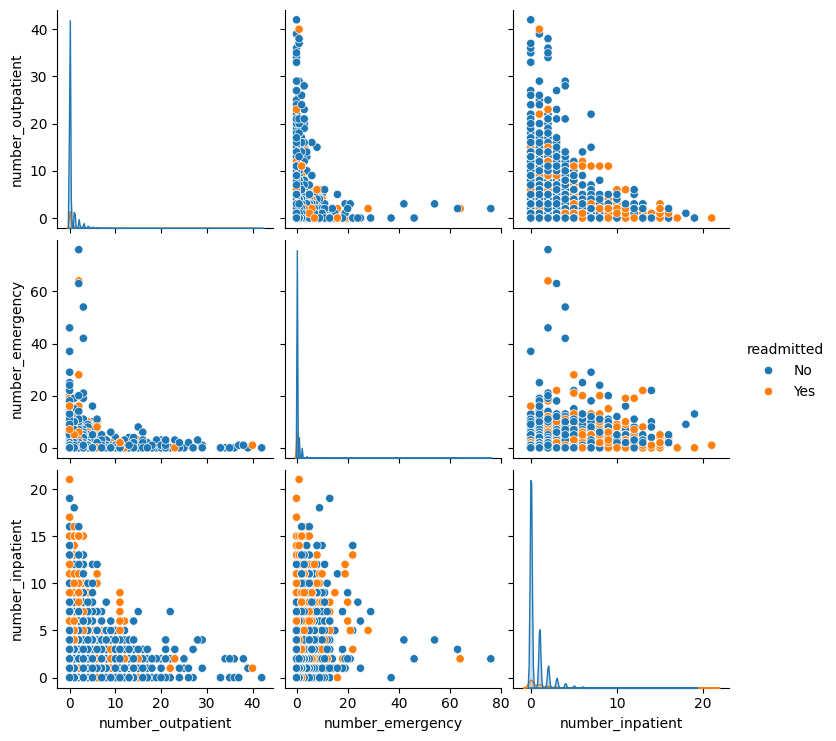

In [346]:
sns.pairplot(data=pair_analysis_other,hue="readmitted")
plt.show()

Bivariate plots help visualize patterns between variables and readmission.
If clear clusters of readmitted patients appear, they can reveal potential risk factors.

# Outlier Analysis

In [347]:
def outliers(dataframe, feature, criteria='IQR', threshold=1.5):
    """
    criteria: 'IQR' (default) or 'zscore'
    threshold: multiplier for IQR or z-score limit
    returns: indices of outlier rows
    """
    if criteria.lower() == 'iqr':
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - threshold * IQR
        upper_limit = Q3 + threshold * IQR

        return dataframe[(dataframe[feature] < lower_limit) | (dataframe[feature] > upper_limit)].index

    elif criteria.lower() == 'zscore':
        mean = dataframe[feature].mean()
        std = dataframe[feature].std()

        z = (dataframe[feature] - mean) / std
        return dataframe[(z < -threshold) | (z > threshold)].index

    else:
        return "Mention correct criteria: 'IQR' or 'zscore'"

skewness

In [348]:
df.select_dtypes(np.number).skew()

time_in_hospital          1.133999
num_lab_procedures       -0.236544
num_procedures            1.316415
num_medications           1.326672
number_outpatient         8.832959
number_emergency         22.855582
number_inpatient          3.614139
number_diagnoses         -0.876746
num_medications_taken     0.681413
dtype: float64

Kurtosis

In [349]:
df.select_dtypes(np.number).kurt()

time_in_hospital            0.850251
num_lab_procedures         -0.245074
num_procedures              0.857110
num_medications             3.468155
number_outpatient         147.907736
number_emergency         1191.686726
number_inpatient           20.719397
number_diagnoses           -0.079056
num_medications_taken       0.292016
dtype: float64

Variance

In [350]:
df.select_dtypes(np.number).var()

time_in_hospital           8.910868
num_lab_procedures       387.080530
num_procedures             2.909777
num_medications           66.057332
number_outpatient          1.605961
number_emergency           0.865779
number_inpatient           1.594824
number_diagnoses           3.738810
num_medications_taken      0.846750
dtype: float64

# Importance of data related to readmition

In [351]:
for feature in ['time_in_hospital','num_lab_procedures','num_medications']:
    indices = outliers(df,feature,threshold=1.5)
    print(f"The number of outliers in {feature:20s} : ",len(indices))

The number of outliers in time_in_hospital     :  2252
The number of outliers in num_lab_procedures   :  143
The number of outliers in num_medications      :  2557


In [352]:
df_exploded = df.copy()
df_exploded['medications'] = df_exploded['medications'].str.split(', ')
df_exploded = df_exploded.explode('medications')
contingency_table = pd.crosstab(df_exploded['medications'], df_exploded['readmitted'])

In [353]:
med_readmit_ratio = contingency_table.div(contingency_table.sum(axis=1), axis=0)

In [354]:
med_readmit_ratio['diff'] = np.abs(med_readmit_ratio['Yes'] - med_readmit_ratio['No'])

In [355]:
threshold = 0.05 

med_readmit_ratio['Significance'] = np.where(med_readmit_ratio['diff'] >= threshold, 'Significant', 'Insignificant')

In [356]:
med_readmit_ratio[['diff', 'Significance']].sort_values(by='diff', ascending=False)

readmitted,diff,Significance
medications,,
glimepiride-pioglitazone,1.000000,Significant
acetohexamide,1.000000,Significant
metformin-rosiglitazone,1.000000,Significant
troglitazone,1.000000,Significant
metformin-pioglitazone,1.000000,Significant
tolbutamide,0.913043,Significant
chlorpropamide,0.883721,Significant
glipizide-metformin,0.846154,Significant
tolazamide,0.846154,Significant


/tmp/ipykernel_56649/2708598356.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=med_readmit_ratio.index, y=med_readmit_ratio['diff'], palette='magma')


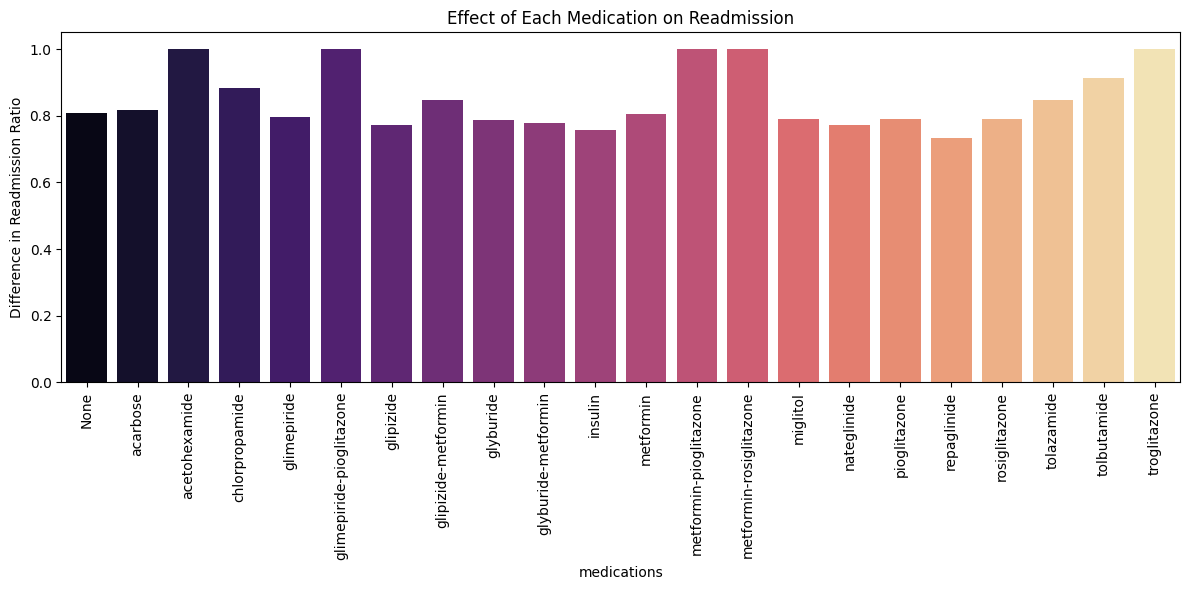

In [357]:
plt.figure(figsize=(12, 6))
sns.barplot(x=med_readmit_ratio.index, y=med_readmit_ratio['diff'], palette='magma')
plt.xticks(rotation=90)
plt.title("Effect of Each Medication on Readmission")
plt.ylabel("Difference in Readmission Ratio")
plt.tight_layout()
plt.show()

In [358]:
df.to_csv('diabetes_cleaned.csv',index=False)